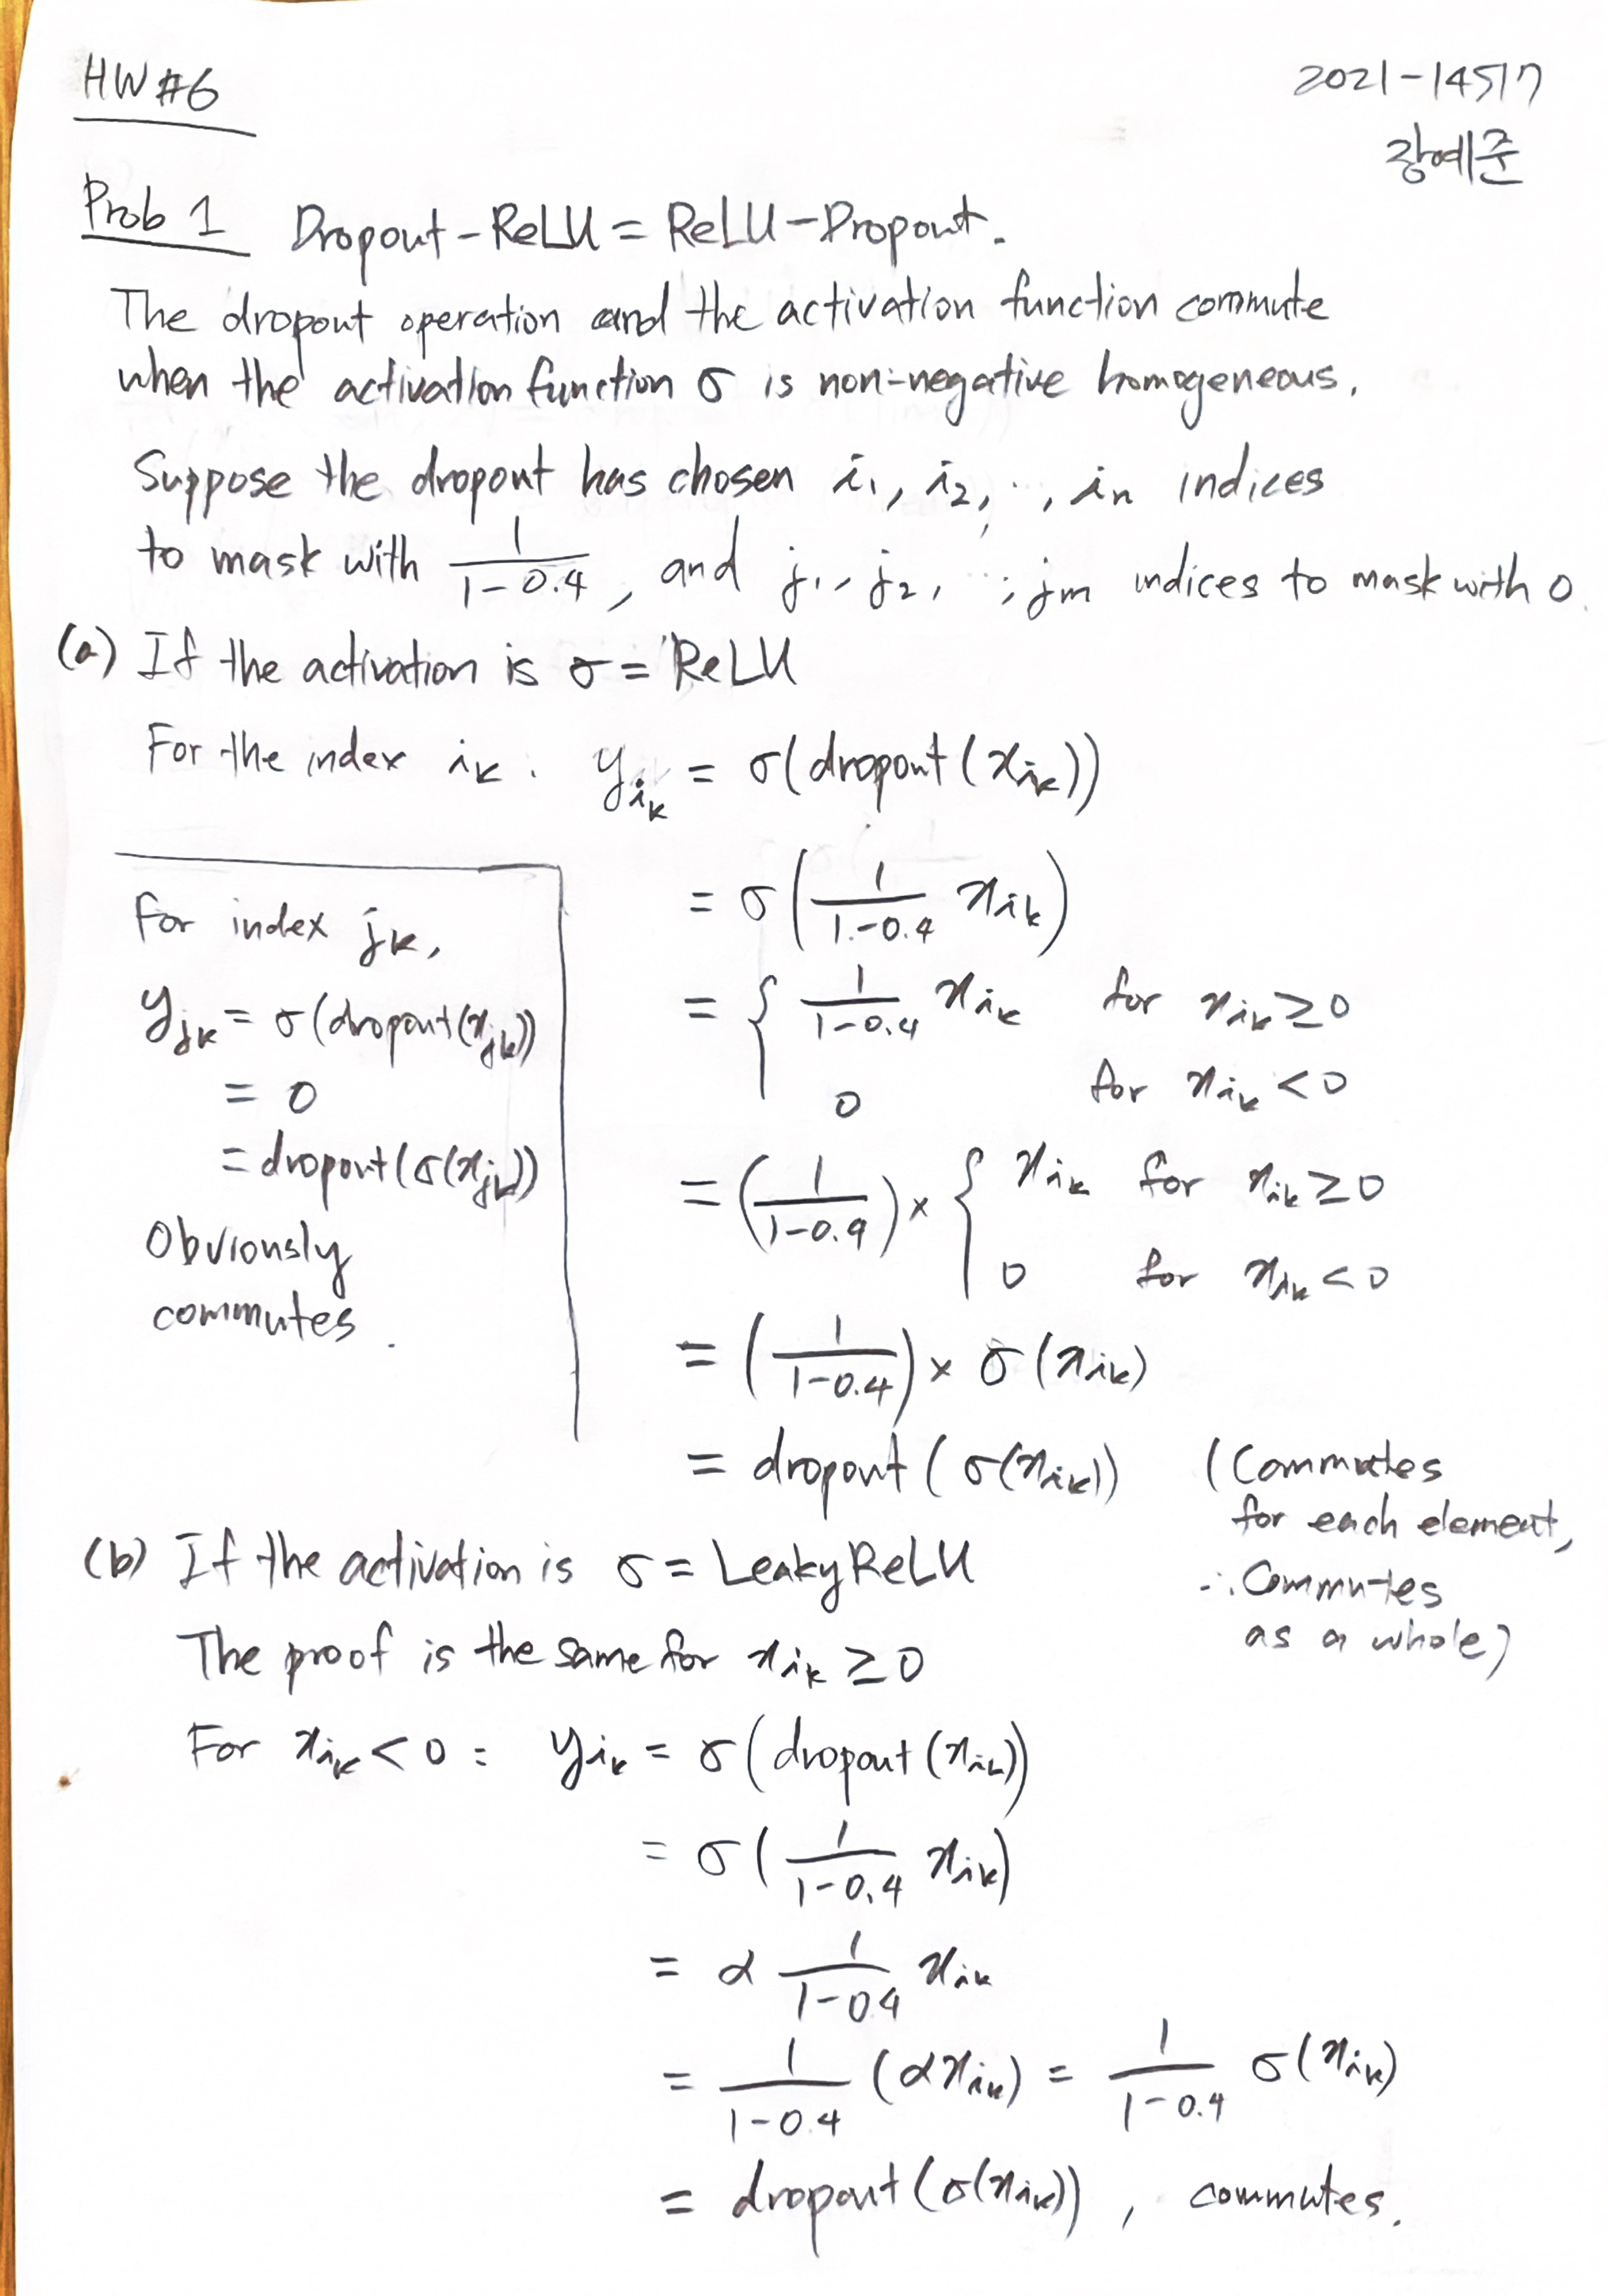

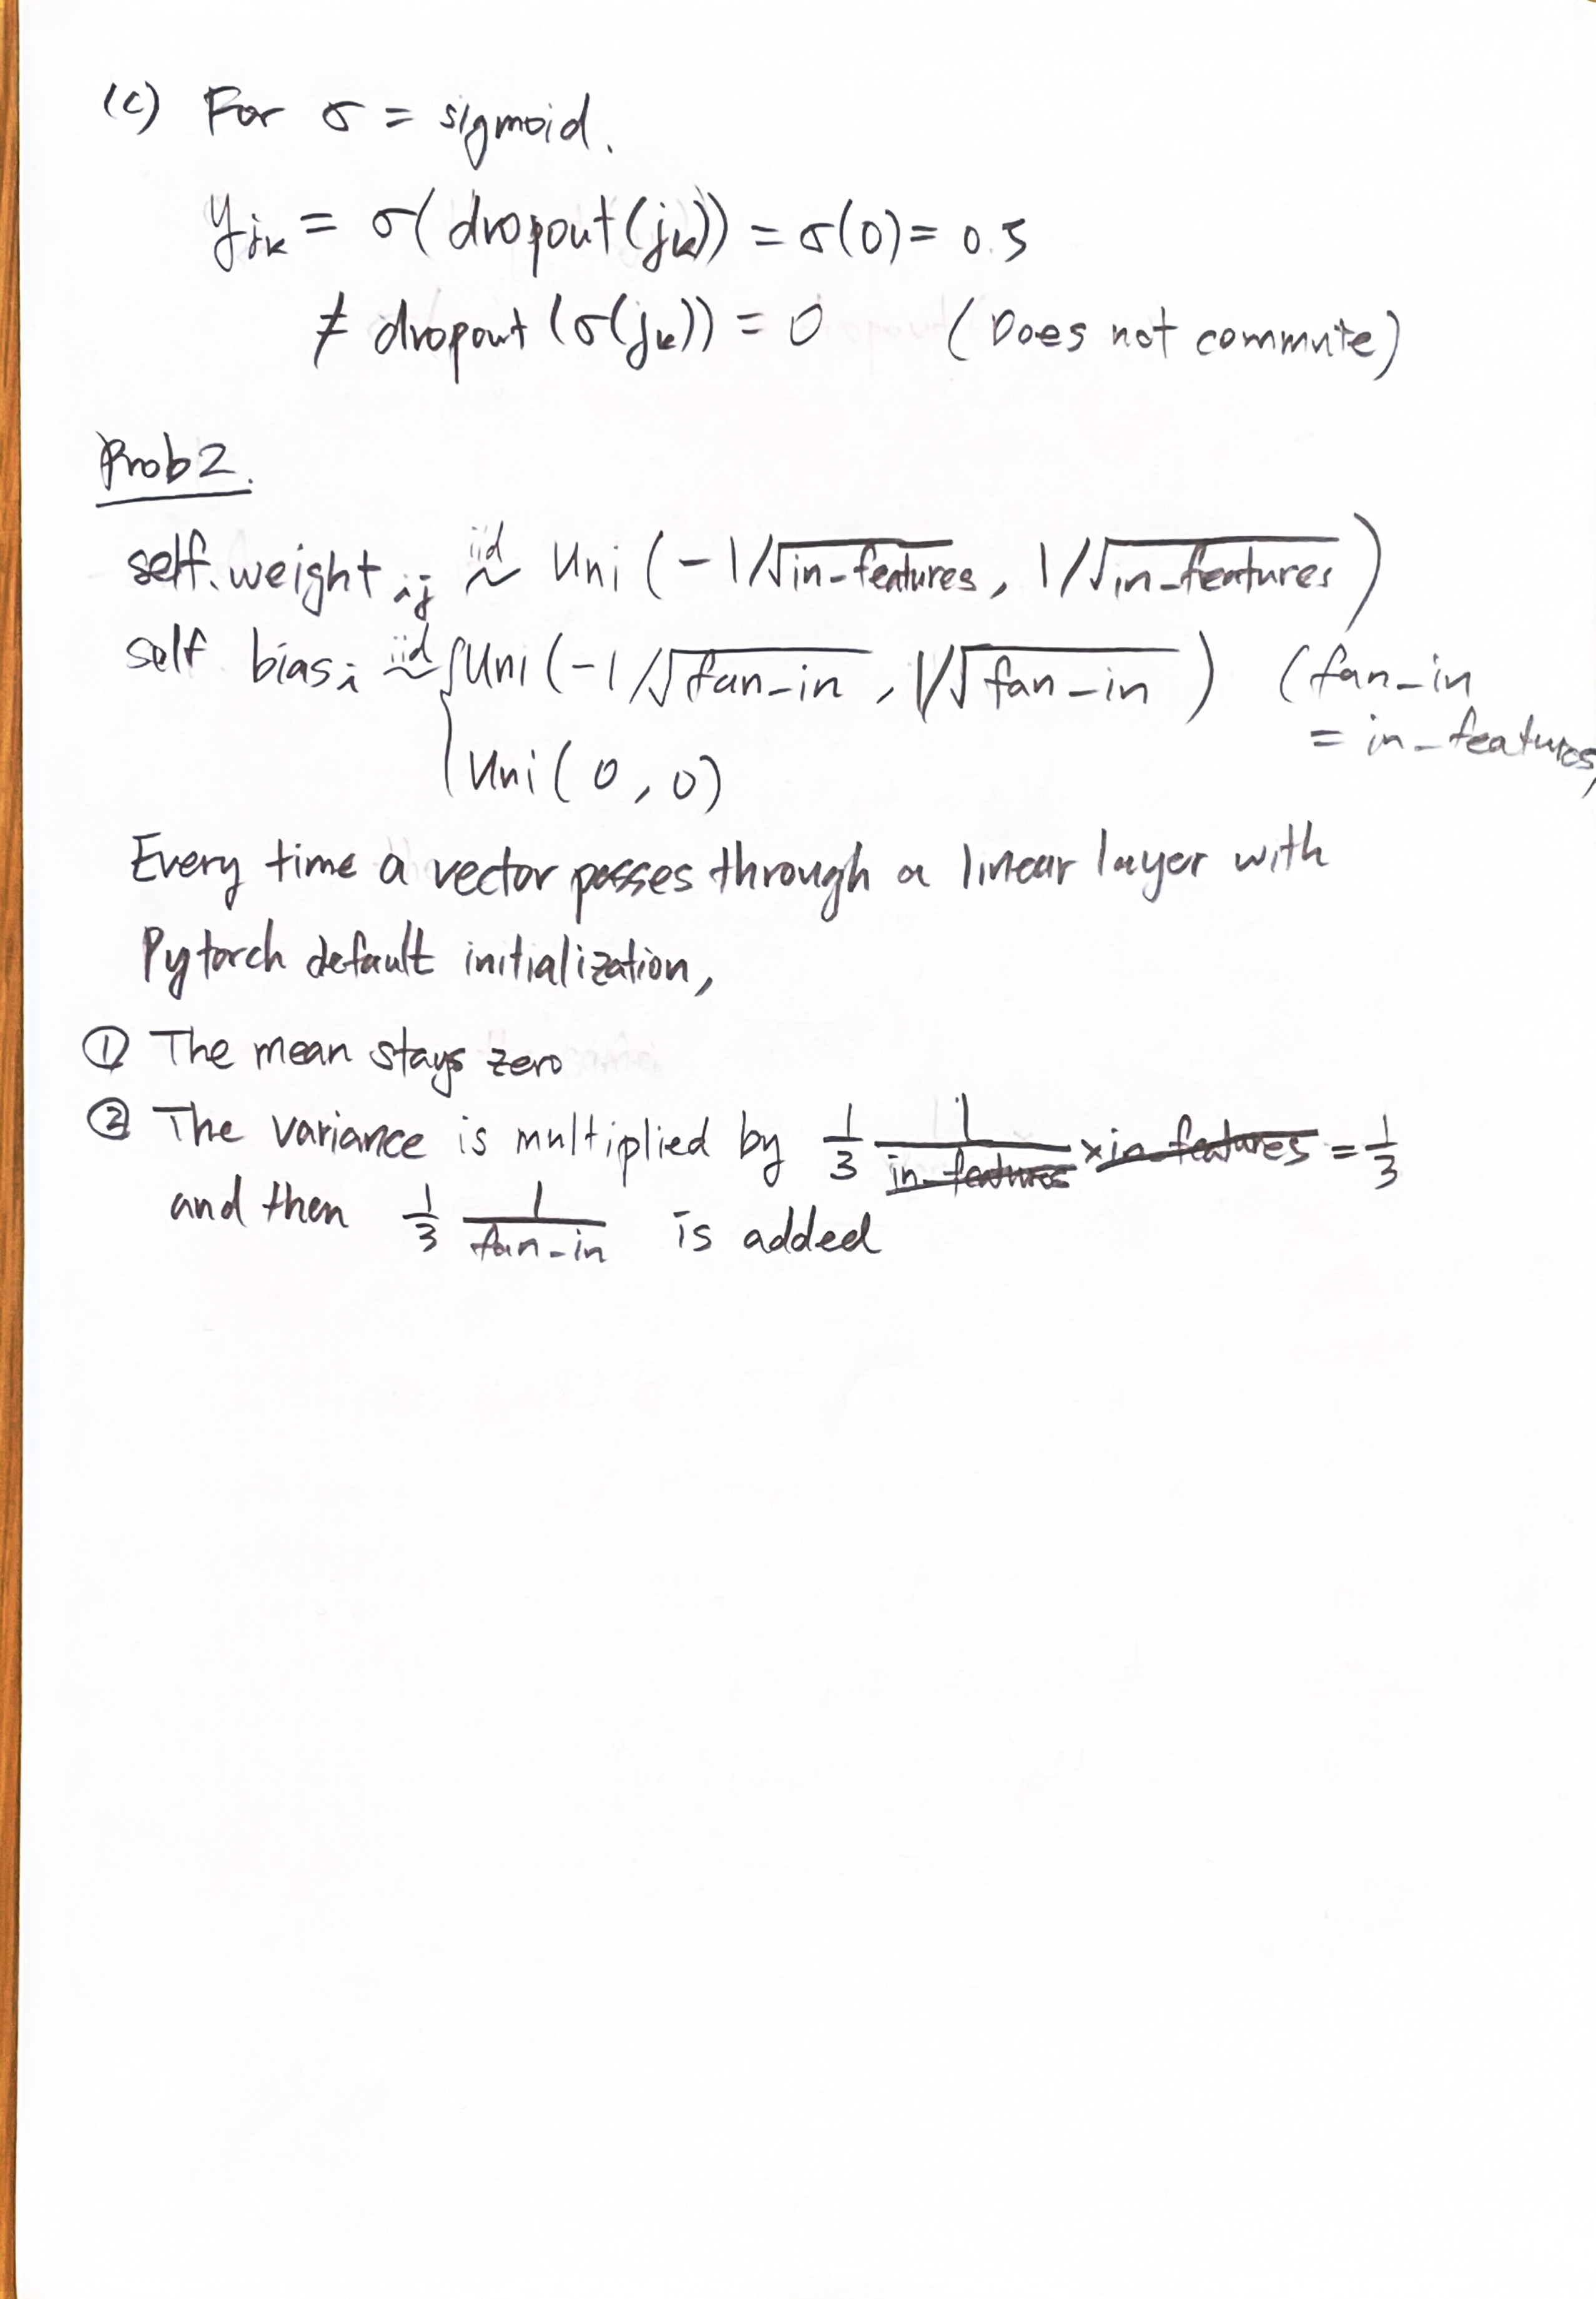

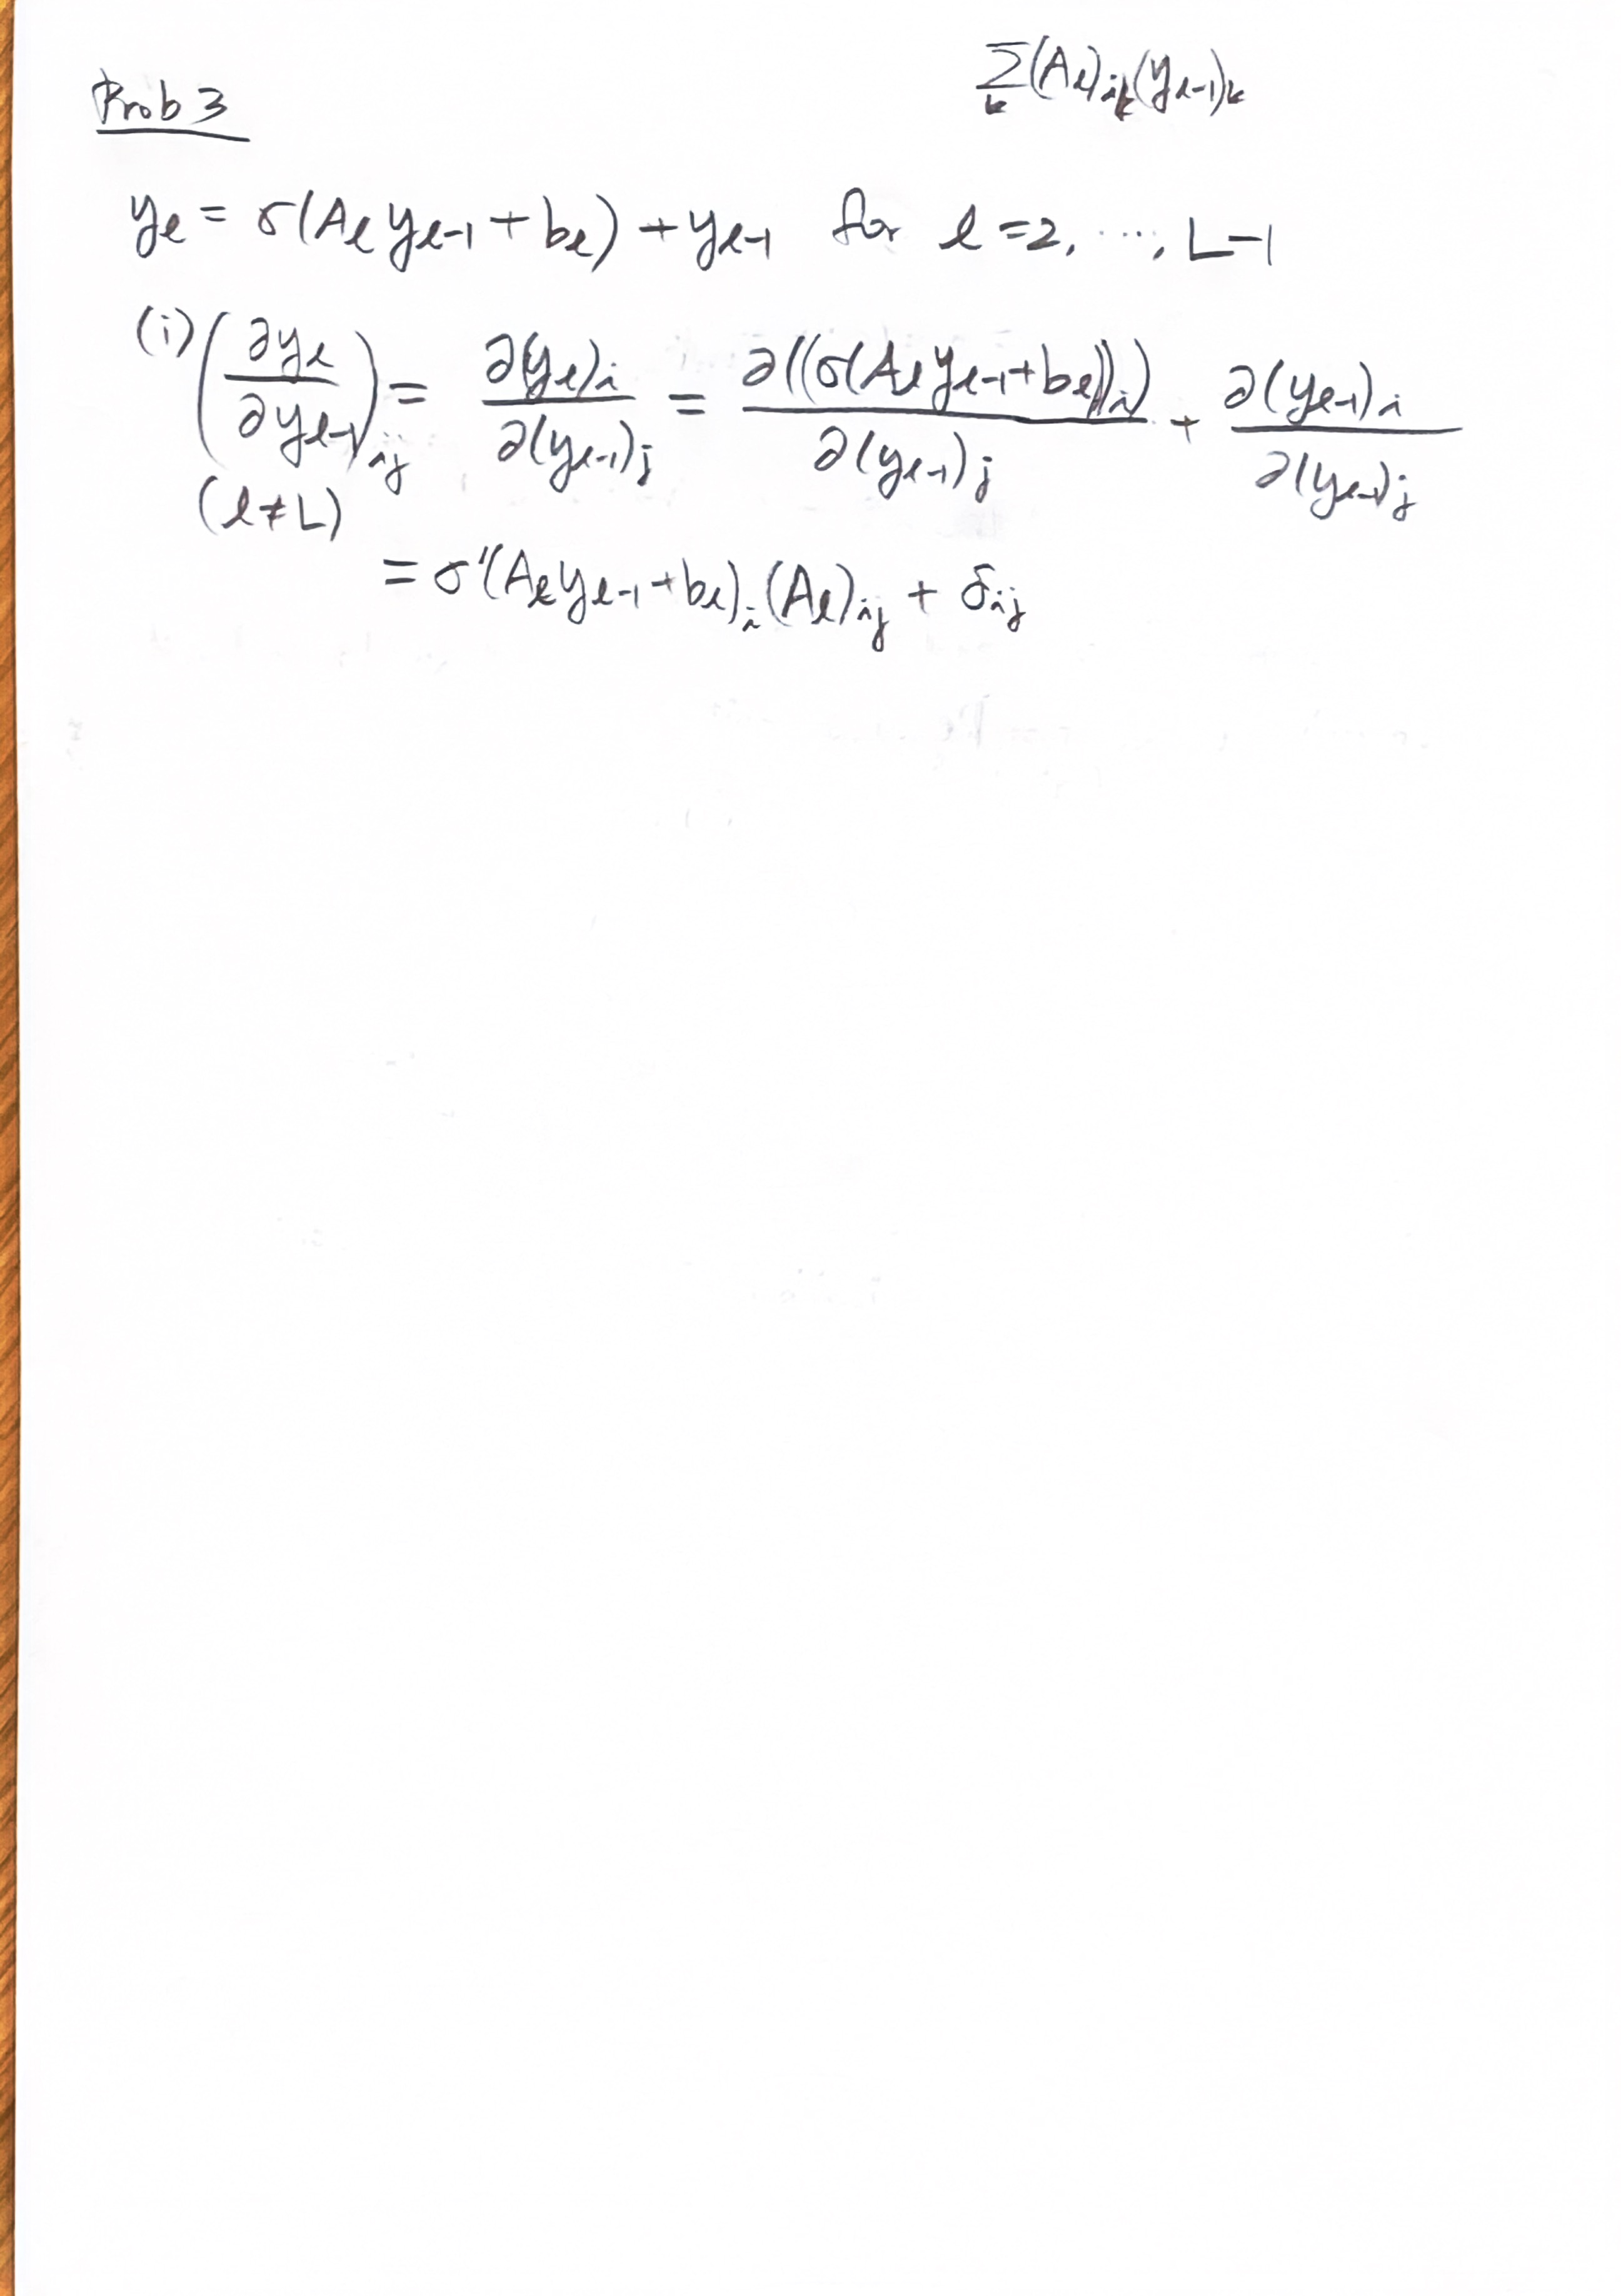

# Problem 4

## (a)
**Original structure**  
(256x128x1x1+128)+(128x128x3x3+128)+(128x256x1x1+256) = 213504  
**Split-transform-merge structure**  
32x((256x4x1x1+4)+(4x4x1x1+4)+(4x256x1x1+256)) = 74496  
The # of params is approximately 3 times less on the Split-transform-merge structure, compared to the original structure.

## (b)

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [6]:
class STMConvLayer(nn.Module):
    def __init__(self):
        super(STMConvLayer , self).__init__()
        self.conv1x1s_01 = nn.ModuleList([nn.Conv2d(256, 4, 1,) for _ in range(32)])
        self.conv3x3s_02 = nn.ModuleList([nn.Conv2d(4, 4, 3, padding=1) for _ in range(32)])
        self.conv1x1s_03 = nn.ModuelList([nn.Conv2d(4, 256, 1,) for _ in range(32)])
    def forward(self, x):
        out = [F.relu(self.conv1x1s_01[i](x)) for i in range(32)]
        out = [F.relu(self.conv3x3s_02[i](out[i])) for i in range(32)]
        out = [F.relu(self.conv1x1s_03[i](out[i])) for i in range(32)]
        out = sum(out)
        return out

# Problem 5

In [7]:
import matplotlib.pyplot as plt 
import numpy as np 


"""
Step 1 : Generate Toy data
"""

d = 35
n_train, n_val, n_test = 300, 60, 30
np.random.seed(0)
beta = np.random.randn(d)
beta_true = beta / np.linalg.norm(beta)
# Generate and fix training data
X_train = np.array([np.random.multivariate_normal(np.zeros(d), np.identity(d)) for _ in range(n_train)])
Y_train = X_train @ beta_true + np.random.normal(loc = 0.0, scale = 0.5, size = n_train)
# Generate and fix validation data (for tuning lambda). 
X_val = np.array([np.random.multivariate_normal(np.zeros(d), np.identity(d)) for _ in range(n_val)])
Y_val = X_val @ beta_true 
# Generate and fix test data
X_test = np.array([np.random.multivariate_normal(np.zeros(d), np.identity(d)) for _ in range(n_test)])
Y_test = X_test @ beta_true 


"""
Step 2 : Solve the problem
"""

lambda_list = [2 ** i for i in range(-6, 6)]
num_params = np.arange(1,1501,10)

errors_opt_lambda = []
errors_fixed_lambda = []
for p in num_params :
    X_tilde = np.maximum(W@X_train+b, 0)
    theta = np.linalg.inv(X_tilde + lamda)@Y@X_tilde

"""
Step 3 : Plot the results
"""    

plt.figure(figsize = (24, 8))
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
plt.rc('font', size = 24)


plt.scatter(num_params, errors_fixed_lambda, color = 'black',
            label = r"Test error with fixed $\lambda = 0.01$",
            ) 
plt.legend()

plt.plot(num_params, errors_opt_lambda, 'k', label = r"Test error with tuned $\lambda$")
plt.legend()
plt.xlabel(r'$\#$ parameters')
plt.ylabel('Test error')
plt.title(r'Test error vs. $\#$ params')

plt.savefig('double_descent.png')
plt.show()

ValueError: x and y must be the same size

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 1728x576 with 1 Axes>